# Naive Bayes

## Task Description

In this exercise, your task is to classify texts using a Naive Bayes Classifier.

You have two datasets: `20newsgroups.csv` and `spam_or_not_spam.csv`.

`spam_or_not_spam.csv` contains e-mails that should be classified in two categories (spam and not spam). 

`20newsgroups.csv` contains newsgroup texts that should be classified in 20 categories.

Your classifier thus should work for an arbitrary number of labels.

You have to implement the following:

1. TF-IDF Vectorization (TF-IDF helps to identify words that are as distinctive as possible for the respective categories);

1. Naive Bayes Classifier for multinomialy distributed data using scikit-learn with a smoothing parameter;

1. Pipeline that loads the data, splits it into 80\% of training and 20\% of test data with shuffling and random_state=42, turns the data into its vector representation using TF-IDF, trains a Naive Bayes classifier and predicts the labels for the test data.

In [4]:
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import _BaseNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
from numpy.typing import ArrayLike
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
def plot_confusion_matrix(
    confusion_matrix: ArrayLike, classes: ArrayLike, title: str
) -> None:
    """Plot the confusion matrix.
    Args:
        confusion_matrix (ArrayLike): The confusion matrix to plot.
    """
    _, ax = plt.subplots(figsize=(8.27, 8.27))
    sns.heatmap(
        confusion_matrix,
        ax=ax,
        square=True,
        annot=True,
        fmt="d",
        xticklabels=classes,
        yticklabels=classes,
    )
    ax.set_xlabel("Prediction", fontsize=16)
    ax.set_ylabel("Truth", fontsize=16)
    ax.set_title(title)

In [6]:
def print_scores(y_test: ArrayLike, y_pred: ArrayLike, classes: ArrayLike) -> None:
    print(f"Accuracy:\t\t{accuracy_score(y_test, y_pred):.3f}")

    if len(classes) == 2:
        print(f"Classes:\t\t{classes[0]} and {classes[1]}")
        print(f"--- {classes[0]} ---")
        print(
            f"Precision:\t\t{precision_score(y_test, y_pred, pos_label=classes[0], zero_division=0):.3f}"
        )
        print(f"Recall:\t\t\t{recall_score(y_test, y_pred, pos_label=classes[0]):.3f}")
        print(f"F1:\t\t\t{f1_score(y_test, y_pred, pos_label=classes[0]):.3f}")
        print(f"--- {classes[1]} ---")
        print(
            f"Precision:\t\t{precision_score(y_test, y_pred, pos_label=classes[1]):.3f}"
        )
        print(f"Recall:\t\t\t{recall_score(y_test, y_pred, pos_label=classes[1]):.3f}")
        print(f"F1:\t\t\t{f1_score(y_test, y_pred, pos_label=classes[1]):.3f}")

In [7]:
def load_text_dataset(dataset_path: str) -> tuple[ArrayLike, ArrayLike]:
    """Load a text dataset from a CSV file using pandas.
    The CSV file should have two columns: the first column contains the text data,
    and the second column contains the labels.
    Args:
        dataset_path (str): Path to the CSV file.
    Returns:
        tuple[ArrayLike, ArrayLike]: A tuple containing the text data and labels.
    """
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    return X, y

In [8]:
def vectorize_text(
    X_train: ArrayLike, X_test: ArrayLike
) -> tuple[csr_matrix, csr_matrix]:
    """Vectorize the text data using TF-IDF.
    Args:
        X_train (ArrayLike): The training text data.
        X_test (ArrayLike): The testing text data.
    Returns:
        tuple[csr_matrix, csr_matrix]: The vectorized training and testing data.
    """

    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_test_vectorized

In [9]:
def naive_bayes_classifier(X: csr_matrix, y: ArrayLike, alpha: float) -> _BaseNB:
    """Train a Naive Bayes classifier.
    Args:
        X (csr_matrix): The training vectorized data.
        y (ArrayLike): The training labels.
        alpha (float): The smoothing parameter.
    Returns:
        _BaseNB: The trained Naive Bayes classifier.
    """

    clf = MultinomialNB(alpha=alpha)
    clf.fit(X, y)  

    return clf

In [10]:
def pipeline_nb_classifier(
    path: str,
    alpha: float = 1,
) -> None:
    """Create a pipeline for text classification using Naive Bayes.
    Args:
        path (str): Path to the CSV file containing the dataset.
        alpha (float): The smoothing parameter for the Naive Bayes classifier.
    """
    # Load the dataset
    X, y = load_text_dataset(path)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    
    # Vectorize the text data
    X_train_vectorized, X_test_vectorized = vectorize_text(X_train, X_test)
    
    # Train the classifier
    clf = naive_bayes_classifier(X_train_vectorized, y_train, alpha)
    
    # Make predictions
    y_pred = clf.predict(X_test_vectorized)
    
    print_scores(y_test, y_pred, classes=clf.classes_)
    
    # Generate confusion matrix
    mat = confusion_matrix(y_test, y_pred)
    
    plot_confusion_matrix(mat, clf.classes_, title=path)

### 20 Newsgroups dataset - Multiclass Classification

Accuracy:		0.869


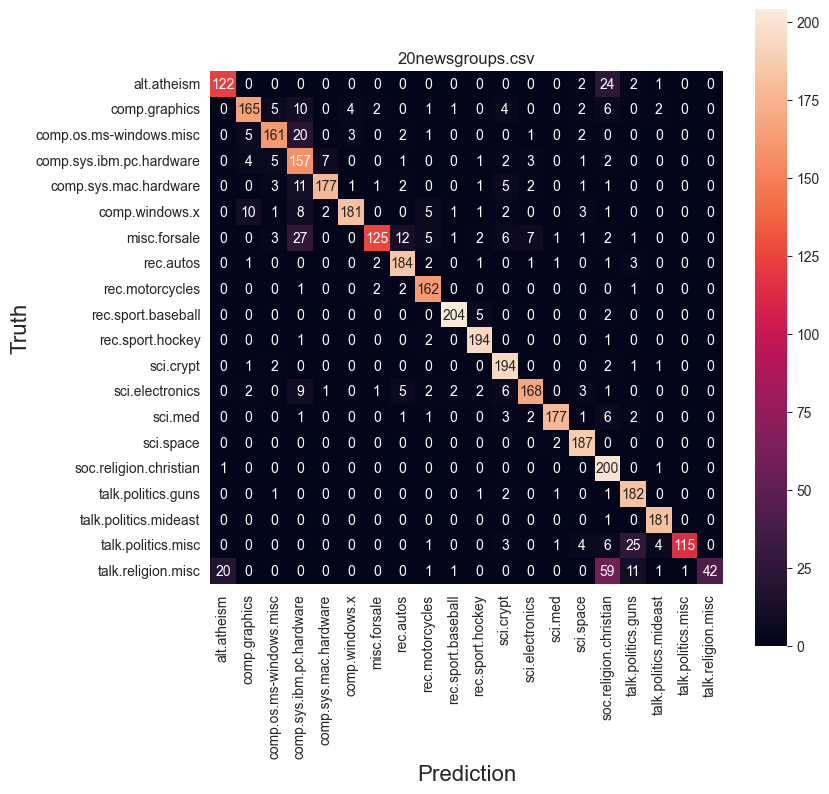

In [11]:
pipeline_nb_classifier("20newsgroups.csv", alpha=0.5)

#### Questions

1. What class does the Naive Bayes Classifier struggle with the most?

### Spam / No Spam dataset - Binary Classification

Accuracy:		0.920
Classes:		Not spam and Spam
--- Not spam ---
Precision:		0.912
Recall:			1.000
F1:			0.954
--- Spam ---
Precision:		1.000
Recall:			0.520
F1:			0.684


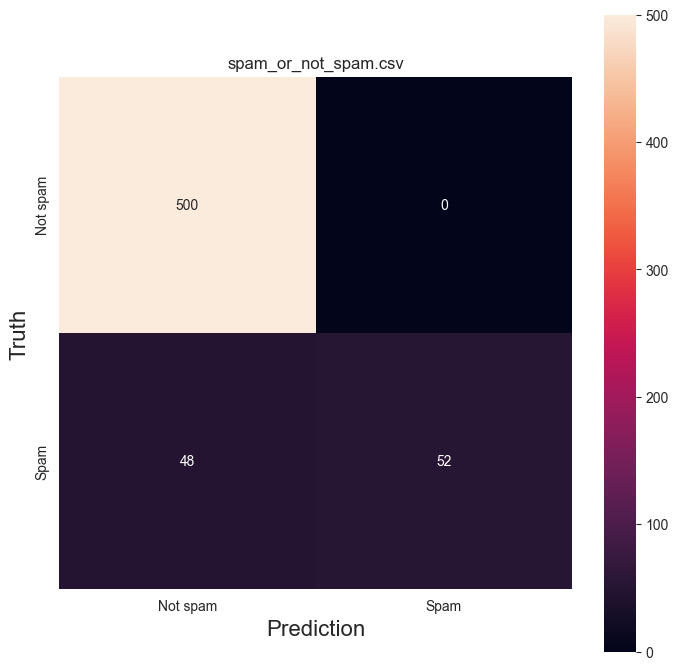

In [12]:
pipeline_nb_classifier("spam_or_not_spam.csv", alpha=0.5)

#### Questions

1. How many False Positives does the Naive Bayes Classifier have?
1. How many False Negatives does the Naive Bayes Classifier have?